<a href="https://colab.research.google.com/github/asavagar/Insolvencies/blob/main/Redundancies_HR1_form.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

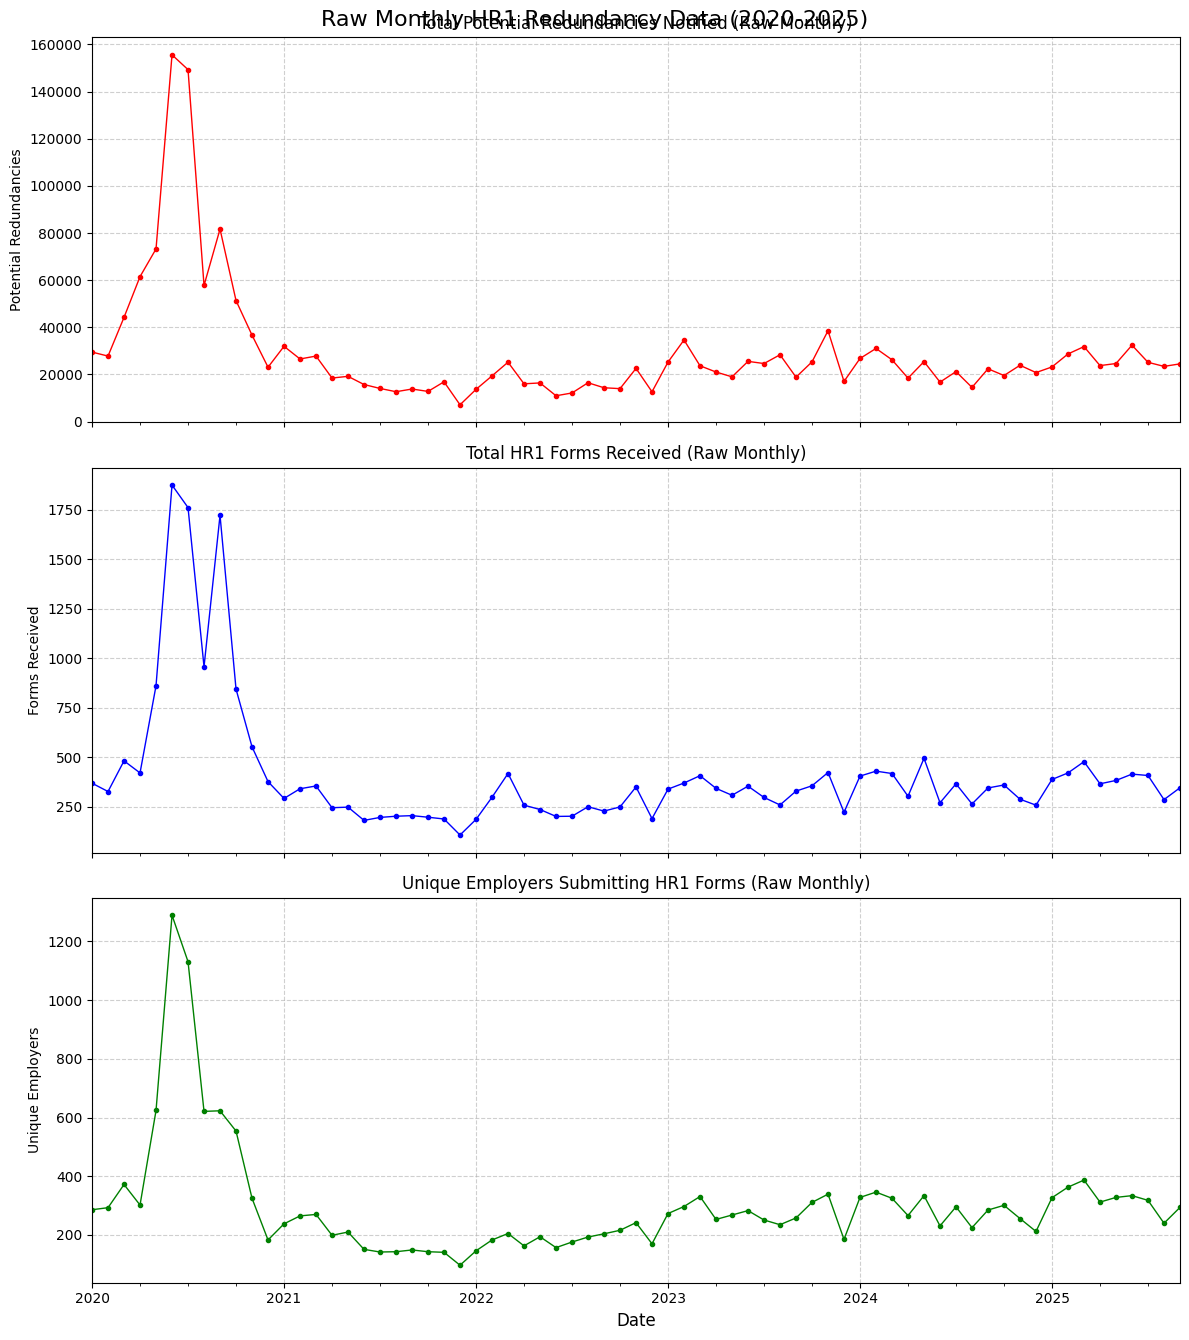

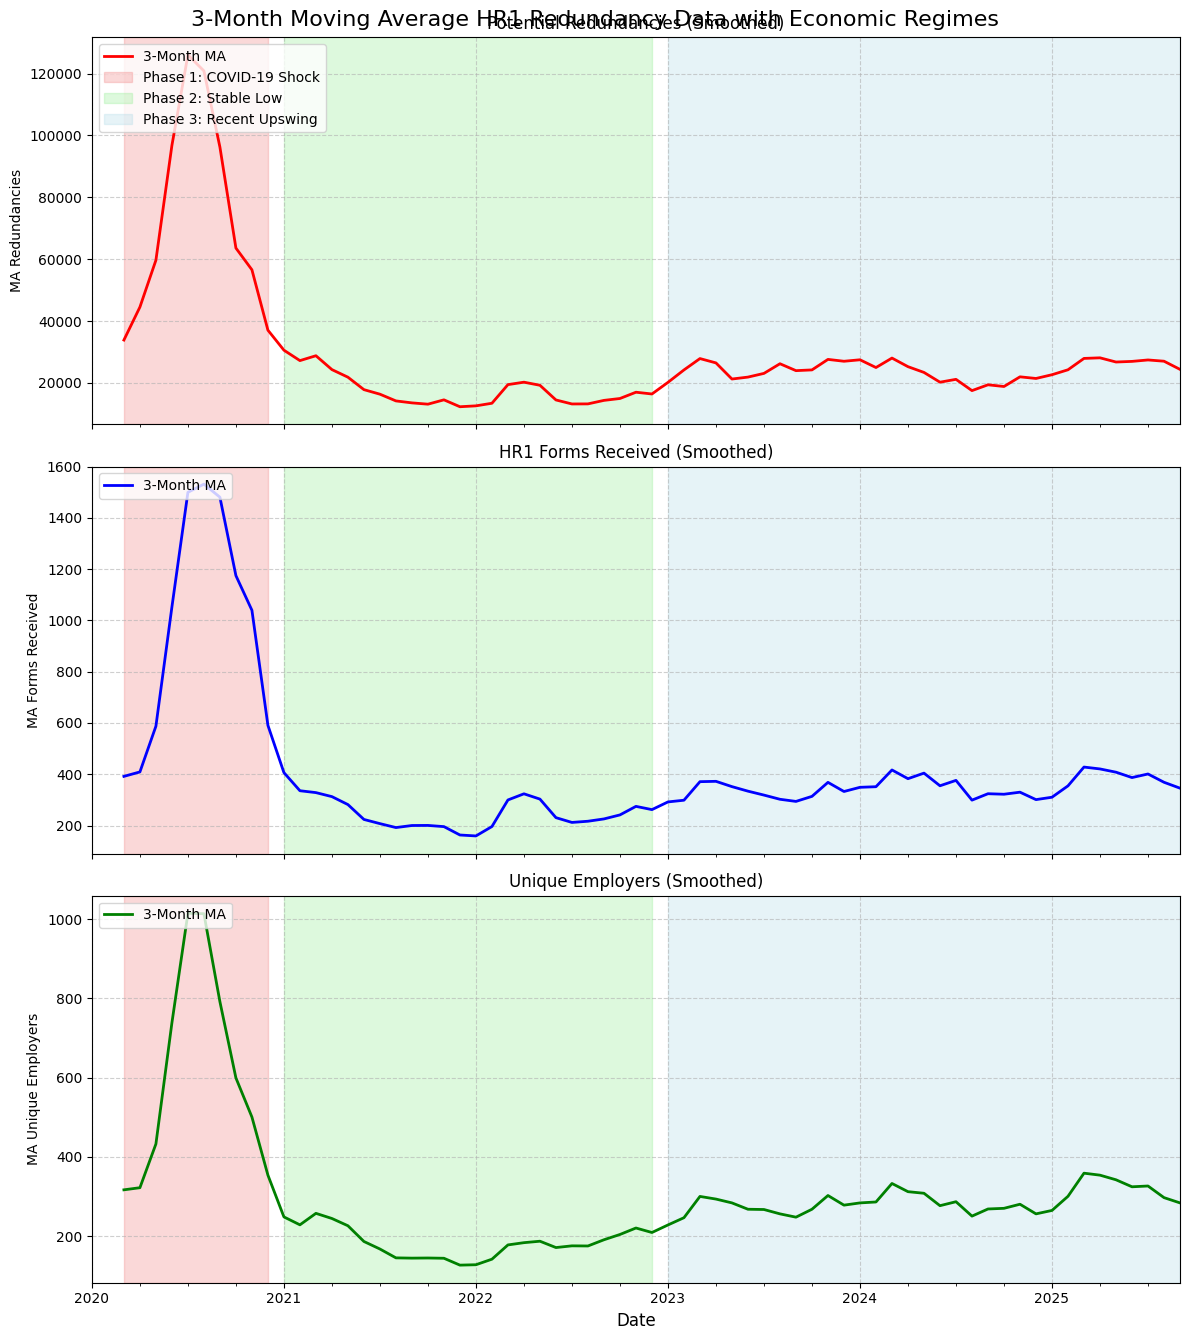

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Data Definition ---
# Source: https://www.gov.uk/government/publications/publication-of-data-on-advanced-notification-of-redundancy-scheme/management-information-on-advanced-notification-of-redundancy-scheme
data = {
    'Year': [2020] * 12 + [2021] * 12 + [2022] * 12 + [2023] * 12 + [2024] * 12 + [2025] * 9,
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] * 5 + ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September'],
    'Forms_Received': [368, 326, 481, 420, 861, 1876, 1762, 957, 1723, 844, 552, 376, 291, 340, 354, 244, 247, 180, 195, 201, 204, 196, 187, 106, 185, 297, 417, 257, 235, 200, 201, 249, 227, 248, 349, 189, 338, 369, 406, 342, 307, 353, 296, 258, 328, 355, 422, 221, 404, 429, 417, 302, 494, 269, 365, 263, 344, 359, 287, 257, 387, 420, 477, 365, 382, 414, 407, 285, 345],
    'Potential_Redundancies': [29496, 27804, 44235, 61502, 73254, 155576, 149301, 57749, 81670, 51351, 36686, 23083, 31946, 26576, 27809, 18492, 19211, 15741, 14078, 12687, 13836, 12818, 16892, 7141, 13684, 19413, 25216, 16041, 16415, 10974, 12159, 16491, 14369, 13992, 22580, 12654, 25257, 34636, 23692, 21045, 19001, 25564, 24641, 28361, 18865, 25359, 38555, 17057, 26788, 31043, 26233, 18450, 25455, 16768, 21212, 14518, 22409, 19559, 23906, 20808, 23199, 28706, 31825, 23769, 24643, 32428, 25162, 23436, 24504],
    'Unique_Employers': [286, 293, 372, 302, 624, 1289, 1131, 621, 623, 554, 325, 183, 238, 265, 270, 199, 210, 151, 142, 143, 149, 143, 141, 97, 146, 183, 205, 163, 194, 157, 176, 193, 204, 216, 242, 170, 273, 297, 331, 253, 268, 283, 251, 235, 258, 311, 339, 185, 328, 346, 325, 266, 334, 231, 296, 225, 285, 301, 256, 212, 327, 363, 387, 312, 328, 334, 318, 240, 294]
}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%B')
df.set_index('Date', inplace=True)

# --- Moving Average Calculation ---
window = 3
df['MA_Potential_Redundancies'] = df['Potential_Redundancies'].rolling(window=window).mean()
df['MA_Forms_Received'] = df['Forms_Received'].rolling(window=window).mean()
df['MA_Unique_Employers'] = df['Unique_Employers'].rolling(window=window).mean()

# --- Shading Phase Definition ---
phases = [
    {'name': 'Phase 1: COVID-19 Shock', 'start': '2020-03-01', 'end': '2020-12-31', 'color': 'lightcoral'},
    {'name': 'Phase 2: Stable Low', 'start': '2021-01-01', 'end': '2022-12-31', 'color': 'lightgreen'},
    {'name': 'Phase 3: Recent Upswing', 'start': '2023-01-01', 'end': df.index.max(), 'color': 'lightblue'}
]

# --- Figure 1: Raw Data Plots (3 Subplots) ---
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15), sharex=True)
fig.suptitle('Raw Monthly HR1 Redundancy Data (2020-2025)', fontsize=16, y=0.92)

# Subplot 1: Potential Redundancies (Raw)
df['Potential_Redundancies'].plot(ax=axes[0], kind='line', marker='.', linestyle='-', color='red', linewidth=1)
axes[0].set_title('Total Potential Redundancies Notified (Raw Monthly)', fontsize=12)
axes[0].set_ylabel('Potential Redundancies', fontsize=10)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Subplot 2: Forms Received (Raw)
df['Forms_Received'].plot(ax=axes[1], kind='line', marker='.', linestyle='-', color='blue', linewidth=1)
axes[1].set_title('Total HR1 Forms Received (Raw Monthly)', fontsize=12)
axes[1].set_ylabel('Forms Received', fontsize=10)
axes[1].grid(True, linestyle='--', alpha=0.6)

# Subplot 3: Unique Employers (Raw)
df['Unique_Employers'].plot(ax=axes[2], kind='line', marker='.', linestyle='-', color='green', linewidth=1)
axes[2].set_title('Unique Employers Submitting HR1 Forms (Raw Monthly)', fontsize=12)
axes[2].set_ylabel('Unique Employers', fontsize=10)
axes[2].set_xlabel('Date', fontsize=12)
axes[2].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('raw_data_plots.png')
plt.show()
plt.close()

# --- Figure 2: Smoothed Data (3 Subplots) with Shading ---
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15), sharex=True)
fig.suptitle(f'{window}-Month Moving Average HR1 Redundancy Data with Economic Regimes', fontsize=16, y=0.92)

plot_details = [
    {'col': 'MA_Potential_Redundancies', 'title': 'Potential Redundancies (Smoothed)', 'ylabel': 'MA Redundancies', 'color': 'red'},
    {'col': 'MA_Forms_Received', 'title': 'HR1 Forms Received (Smoothed)', 'ylabel': 'MA Forms Received', 'color': 'blue'},
    {'col': 'MA_Unique_Employers', 'title': 'Unique Employers (Smoothed)', 'ylabel': 'MA Unique Employers', 'color': 'green'}
]

for i, detail in enumerate(plot_details):
    ax = axes[i]
    df[detail['col']].plot(ax=ax, kind='line', linestyle='-', color=detail['color'], linewidth=2)

    # Add shading for each phase
    for j, phase in enumerate(phases):
        # Only add the label to the legend on the first subplot
        label = phase['name'] if i == 0 else None
        ax.axvspan(phase['start'], phase['end'], color=phase['color'], alpha=0.3, label=label)

    ax.set_title(detail['title'], fontsize=12)
    ax.set_ylabel(detail['ylabel'], fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.6)
    if i < len(plot_details) - 1:
        ax.set_xlabel('')
    else:
        ax.set_xlabel('Date', fontsize=12)

    # Custom legend for the first subplot to include shading labels
    if i == 0:
        handles, labels = ax.get_legend_handles_labels()
        # Separate line handle from phase handles
        line_handle = handles[0]
        phase_handles = handles[1:]
        ax.legend(handles=[line_handle] + phase_handles, labels=[f'{window}-Month MA'] + [p['name'] for p in phases], fontsize=10, loc='upper left')
    else:
        ax.legend([f'{window}-Month MA'], loc='upper left', fontsize=10)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('smoothed_data_shaded_plots.png')
plt.show()
plt.close()